In [3]:
# Generazione di un numero intero in un intervallo tra due numeri interi con un simulatore ideale di un circuito quantistico

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Parametri iniziali

a = int(input('Inserisci a, estremo sx dell\'intervallo\' (intero) : '))
b = int(input('Inserisci b, estremo dx dell\'intervallo\'(intero) : '))

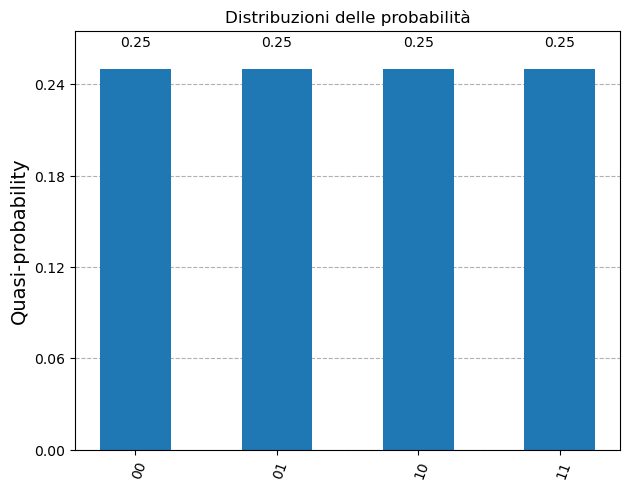

        ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─░─┤M├───
        ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 


In [ ]:
%matplotlib inline

# Creazione di un circuito quantistico per la generazione di un numero intero casuale in [0,(b-a)]
num_bit = (b-a).bit_length()
qc = QuantumCircuit(num_bit)
# aggiunta dei gates di Hadamard in qc
qc.h(qc.qubits)

# Verifica che la probabilità di generare un qualsiasi numero intero in [0,(b-a)] con qc sia uguale per tutti (= 1/(2^(num_bit)) ) 
state_vector = Statevector.from_instruction(qc) 
probs = state_vector.probabilities_dict()
# rappresentazione grafica
plot_histogram(probs)
plt.title("Distribuzioni delle probabilità")
plt.show()

# aggiunta dei gate di misurazione in qc
qc.measure_all()
print(qc)


In [ ]:
# Definizione del simulatore ideale del circuito quantistico
simulator = AerSimulator(method = 'statevector')

# Generazione di un intero nell'intervallo [a,b] 
prop = True
while( prop ) :
    result = simulator.run(qc, shots=1).result()
    numero_binario = list(result.get_counts().keys())[0] # numero binario
    numero_intero = int(numero_binario, 2) # numero intero
    prop = numero_intero > (b-a)
    if (prop == False) : # numero_intero in [0,b-a]
        numero_intero = a + numero_intero # numero_intero in [a,b]

print(f'numero casuale tra {a} e {b}: {numero_intero}')

numero casuale tra 0 e 3: 0


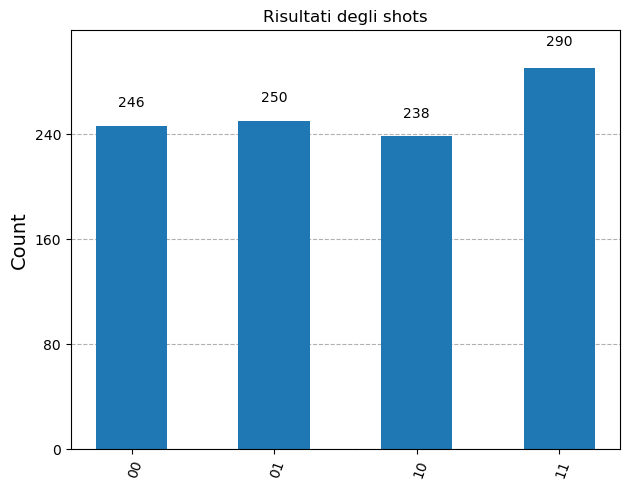

Media : 256.0
Deviazione standard : 23.209193580705612


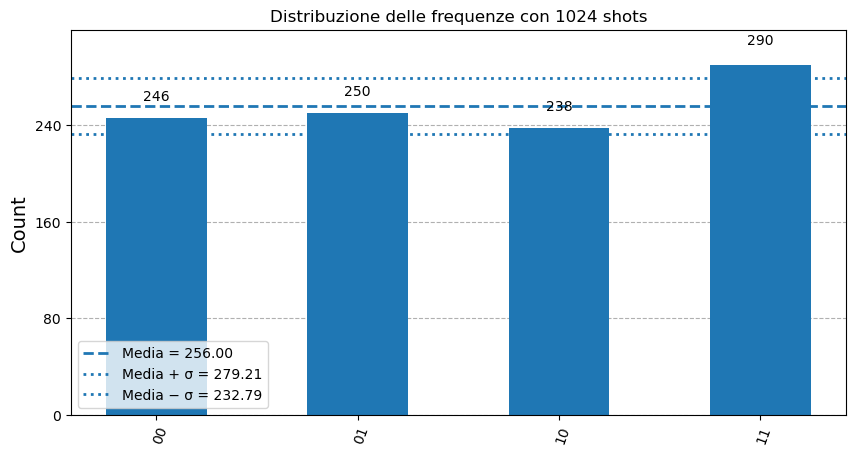

In [9]:
%matplotlib inline
# Analisi statistica dei risultati 

num_shots = 1024 
result = simulator.run(qc, shots=num_shots).result()  

# Risultati degli shots
counts = result.get_counts() # dizionario: chiavi = configurazioni binarie, valori = frequenze negli shots
# rappresentazione grafica
plot_histogram(counts) 
plt.title("Risultati degli shots")
plt.show()

# Media e deviazione standard delle frequenze delle configurazioni binarie
valori_int = np.array([int(v) for v in counts.values()])
media = np.mean(valori_int)
dev_std = np.std(valori_int, ddof=1)
print(f"Media : {media}" )
print(f"Deviazione standard : {dev_std}")
# rappresentazione grafica
fig, ax = plt.subplots(figsize=(10,5))
plot_histogram(counts, ax=ax)
ax.axhline(media, linestyle='--', linewidth=2, label=f"Media = {media:.2f}")
ax.axhline(media + dev_std, linestyle=':', linewidth=2, label=f"Media + σ = {media+dev_std:.2f}")
ax.axhline(media - dev_std, linestyle=':', linewidth=2, label=f"Media − σ = {media-dev_std:.2f}")
ax.set_title(f"Distribuzione delle frequenze con {num_shots} shots")
ax.legend()
plt.show()